# 🛠️ MODELING

---
## 📦 Importación de librerías
---

In [1]:
# =============================================================
# ⚙️ Configuración inicial de entorno y librerías para limpieza
# -------------------------------------------------------------
# ➤ Importa librerías principales: pandas, numpy, matplotlib, seaborn.
# ➤ Configura estilos y formato de impresión en Jupyter.
# ➤ Mejora la visualización y autocompletado en notebooks.
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import xgboost

# 🎯 Configuración de visualización
pd.options.display.float_format = '{:.2f}'.format    # Evita notación científica
pd.set_option('display.max_columns', None)           # Muestra todas las columnas
pd.set_option('display.max_colwidth', None)          # Muestra todo el contenido de celdas

# 🎯 Estilo visual en Jupyter
from IPython.display import display, HTML
display(HTML("""<style> th { text-align: center !important; font-weight: bold !important; } </style>"""))

# 🧠 Mejora el autocompletado en Jupyter mostrando sugerencias incluso dentro de objetos anidados (como df['col'].str.)
%config IPCompleter.greedy = True  

# 📊 Asegura que los gráficos de Matplotlib se muestren directamente en las celdas del notebook
%matplotlib inline 

---
## 📥 Configuración del entorno para importar módulos internos
---

In [2]:
# =============================================================
# 🧭 Configuración del entorno para importar módulos internos
# -------------------------------------------------------------
# ➤ Añade la ruta del proyecto al sys.path para importar desde 'src'.
# ➤ Llama a la función `configurar_entorno()` si ya está disponible.
# ➤ Importa funciones necesarias desde módulos utilitarios.
# =============================================================

from pathlib import Path
import sys

# Añadir ruta a 'src/' si no está ya incluida (solo para Jupyter)
project_root = Path.cwd().resolve().parents[0]
src_path = project_root / "src"
if src_path.exists() and str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# ✅ Importar configuración del entorno desde utils
from utils import configurar_entorno, get_file_path, load_data

# Ejecutar configuración del entorno
configurar_entorno()

# Importar funciones desde modeling.py
#from modeling import 

---
## 📥 Carga de datos originales
---

In [3]:
# =============================================================
# 📦 Carga de datos de trabajo, categóricos y numéricos
# -------------------------------------------------------------
# ➤ Si existe el archivo .pkl, lo carga desde cache.
# ➤ Si no, lo carga desde el archivo CSV procesado.
# ➤ Muestra información general de cada DataFrame.
# =============================================================

# from eda import cargar_dataframes

# df = cargar_dataframes("df_modelo", "df")

# # ✅ Vista previa
# print("✅ Vista previa del DataFrame `df`:")
# display(df)


df = pd.read_csv("../data/processed/df_modelo.csv")
print("✅ Dataset cargado correctamente.")
display(df.head())

✅ Dataset cargado correctamente.


,target,empleo_Driver,empleo_Manager,empleo_OTROS,empleo_Owner,empleo_RN,empleo_Registered Nurse,empleo_Sales,empleo_Supervisor,empleo_Teacher,ingresos_verificados_Not Verified,ingresos_verificados_Source Verified,ingresos_verificados_Verified,vivienda_MORTGAGE,vivienda_OWN,vivienda_RENT,finalidad_car,finalidad_credit_card,finalidad_debt_consolidation,finalidad_home_improvement,finalidad_house,finalidad_major_purchase,finalidad_medical,finalidad_moving,finalidad_other,finalidad_small_business,finalidad_vacation,rating_ord,antiguedad_empleo,ingresos,dti,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,num_cuotas,imp_cuota,principal
0,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.18,0.19,2.00,10.00,0.33,0.12,0.00,0,10.00,0.00,0.27,0.37
1,1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,1.00,0.22,0.25,1.00,15.00,0.86,0.24,0.00,0,0.00,0.00,0.21,0.24
2,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.45,0.15,0.00,19.00,0.00,0.04,0.00,0,0.00,0.00,0.43,0.59
3,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.89,0.63,0.12,3.00,15.00,0.00,0.01,0.00,0,0.00,1.00,0.32,0.67
4,0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.67,0.42,0.09,1.00,6.00,0.33,0.19,0.00,0,16.00,0.00,0.42,0.54



- algoritmos de preseleccion de variables

In [4]:
# 1.Preparamos x e y

X = df.drop(columns='target')
y = df['target']

In [5]:
# =============================================================
# 📦 Importar y aplicar función de división escalonada
# -------------------------------------------------------------
# ➤ Divide el dataset en: X_train, X_test, X_val, y_train, y_test, y_val
# ➤ Usa la función modularizada de 'src/utils.py'
# ➤ Puedes ajustar val_size y test_size según el proyecto
# =============================================================

from modeling import dividir_dataset_escalonado

# Aplicar división escalonada (20% validación, 16% test final)
X_train, X_test, X_val, y_train, y_test, y_val = dividir_dataset_escalonado(
    df=df,
    target='target',
    val_size=0.20,
    test_size=0.20,
    random_state=42
)

# ✅ Comprobación de tamaños
print(f"Total registros:     {len(df)}")
print(f"Train:               {len(X_train)} registros ({len(X_train)/len(df):.0%})")
print(f"Test:                {len(X_test)} registros ({len(X_test)/len(df):.0%})")
print(f"Validación (val):    {len(X_val)} registros ({len(X_val)/len(df):.0%})")

Total registros:     198679
Train:               127154 registros (64%)
Test:                31789 registros (16%)
Validación (val):    39736 registros (20%)


---
## Regresión Logística
---

🎯 ROC AUC en test: 0.7000

📌 Conclusión AUC:
   ➤ Discriminación aceptable. Puede mejorarse con feature engineering.


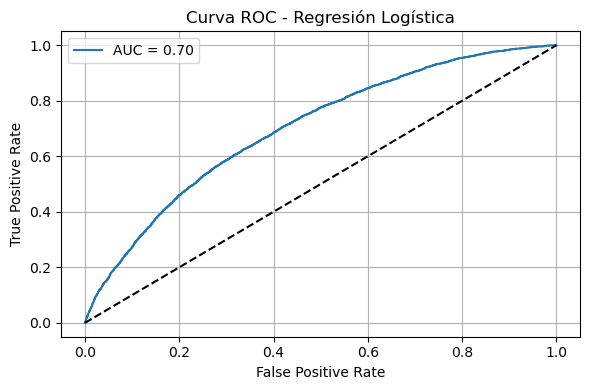

📊 Curva ROC:
   ➤ La curva debe estar lo más alejada posible de la diagonal.
   ➤ Si está cerca de la diagonal, el modelo no es mejor que el azar.
   ➤ Sirve para evaluar la sensibilidad vs especificidad a distintos umbrales.


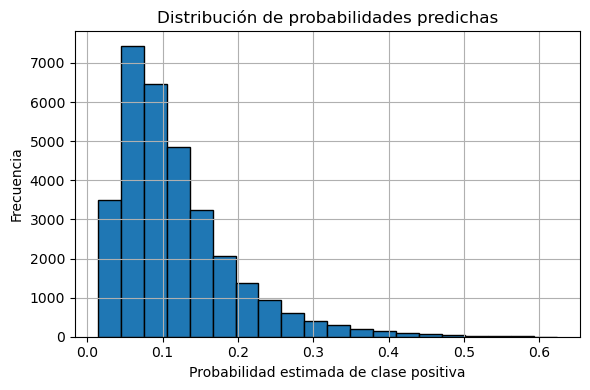

📈 Distribución de probabilidades:
   ➤ Verifica si el modelo está seguro en sus predicciones.
   ➤ Si muchas predicciones están cerca de 0.5, el modelo duda mucho.
   ➤ Recomendación: considerar ajustar el umbral de clasificación para optimizar precisión o recall.


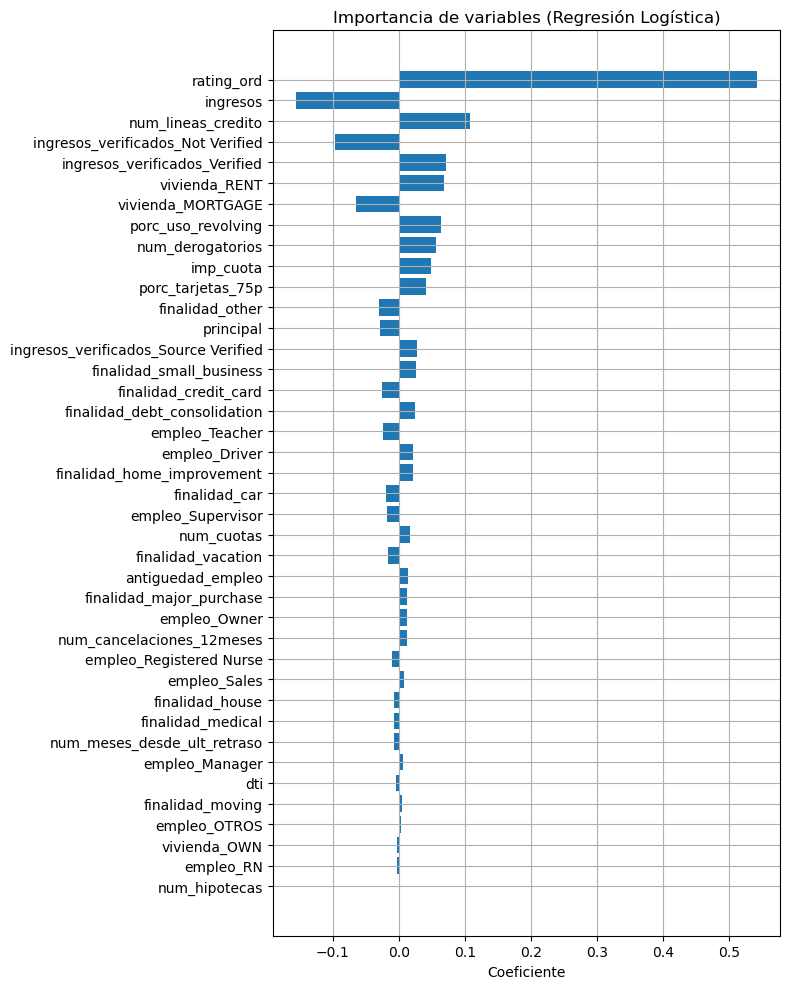

📌 Coeficientes del modelo:
   ➤ Muestran el impacto de cada variable en la predicción.
   ➤ Valores positivos: aumentan probabilidad de clase positiva.
   ➤ Valores negativos: la reducen.
   ➤ Recomendación: revisar si las variables más influyentes tienen sentido según el contexto del negocio.

🔧 Parámetros del modelo:
• C: 1.0
• class_weight: None
• dual: False
• fit_intercept: True
• intercept_scaling: 1
• l1_ratio: None
• max_iter: 1000
• multi_class: deprecated
• n_jobs: None
• penalty: l2
• random_state: None
• solver: lbfgs
• tol: 0.0001
• verbose: 0
• warm_start: False


In [6]:
# =============================================================
# 📦 Regresión Logística: Entrenamiento, Evaluación y Visualización
# =============================================================

# 📚 Importación de librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# -----------------------------------------
# 1️⃣ Escalado de variables numéricas
# -----------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------
# 2️⃣ Entrenamiento del modelo
# -----------------------------------------
rl = LogisticRegression(max_iter=1000)
rl.fit(X_train_scaled, y_train)

# -----------------------------------------
# 3️⃣ Predicción de probabilidades
# -----------------------------------------
pred = rl.predict_proba(X_test_scaled)[:, 1]

# -----------------------------------------
# 4️⃣ Evaluación con ROC AUC
# -----------------------------------------
roc_auc = roc_auc_score(y_test, pred)
print(f"🎯 ROC AUC en test: {roc_auc:.4f}\n")
print("📌 Conclusión AUC:")
if roc_auc >= 0.9:
    print("   ➤ Excelente capacidad de discriminación del modelo.")
elif roc_auc >= 0.8:
    print("   ➤ Muy buena discriminación. Modelo confiable.")
elif roc_auc >= 0.7:
    print("   ➤ Discriminación aceptable. Puede mejorarse con feature engineering.")
else:
    print("   ➤ Baja discriminación. Revisar variables, balanceo o complejidad del modelo.")

# -----------------------------------------
# 5️⃣ Curva ROC
# -----------------------------------------
fpr, tpr, _ = roc_curve(y_test, pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("📊 Curva ROC:")
print("   ➤ La curva debe estar lo más alejada posible de la diagonal.")
print("   ➤ Si está cerca de la diagonal, el modelo no es mejor que el azar.")
print("   ➤ Sirve para evaluar la sensibilidad vs especificidad a distintos umbrales.")

# -----------------------------------------
# 6️⃣ Histograma de probabilidades predichas
# -----------------------------------------
plt.figure(figsize=(6, 4))
plt.hist(pred, bins=20, edgecolor='black')
plt.xlabel("Probabilidad estimada de clase positiva")
plt.ylabel("Frecuencia")
plt.title("Distribución de probabilidades predichas")
plt.grid(True)
plt.tight_layout()
plt.show()

print("📈 Distribución de probabilidades:")
print("   ➤ Verifica si el modelo está seguro en sus predicciones.")
print("   ➤ Si muchas predicciones están cerca de 0.5, el modelo duda mucho.")
print("   ➤ Recomendación: considerar ajustar el umbral de clasificación para optimizar precisión o recall.")

# -----------------------------------------
# 7️⃣ Visualización de coeficientes del modelo
# -----------------------------------------
# Nombres de variables (si X_train es un DataFrame)
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"var_{i}" for i in range(X_train.shape[1])]
coef = rl.coef_[0]

# DataFrame de coeficientes ordenado
coef_df = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coef,
    "Importancia": np.abs(coef)
}).sort_values(by="Importancia", ascending=False)

# Gráfico de barras horizontales
plt.figure(figsize=(8, 10))
plt.barh(coef_df["Variable"], coef_df["Coeficiente"])
plt.xlabel("Coeficiente")
plt.title("Importancia de variables (Regresión Logística)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

print("📌 Coeficientes del modelo:")
print("   ➤ Muestran el impacto de cada variable en la predicción.")
print("   ➤ Valores positivos: aumentan probabilidad de clase positiva.")
print("   ➤ Valores negativos: la reducen.")
print("   ➤ Recomendación: revisar si las variables más influyentes tienen sentido según el contexto del negocio.")

# -----------------------------------------
# 8️⃣ Inspección de parámetros del modelo
# -----------------------------------------
print("\n🔧 Parámetros del modelo:")
for param, value in rl.get_params().items():
    print(f"• {param}: {value}")


---
## XGBoost
---

[0]	validation_0-auc:0.69335
[1]	validation_0-auc:0.69793
[2]	validation_0-auc:0.69973
[3]	validation_0-auc:0.70109
[4]	validation_0-auc:0.70127
[5]	validation_0-auc:0.70247
[6]	validation_0-auc:0.70320
[7]	validation_0-auc:0.70445
[8]	validation_0-auc:0.70469
[9]	validation_0-auc:0.70495
[10]	validation_0-auc:0.70535
[11]	validation_0-auc:0.70561
[12]	validation_0-auc:0.70572
[13]	validation_0-auc:0.70569
[14]	validation_0-auc:0.70620
[15]	validation_0-auc:0.70638
[16]	validation_0-auc:0.70664
[17]	validation_0-auc:0.70681
[18]	validation_0-auc:0.70681
[19]	validation_0-auc:0.70658
[20]	validation_0-auc:0.70657
[21]	validation_0-auc:0.70612
[22]	validation_0-auc:0.70598
[23]	validation_0-auc:0.70584

📦 Primeras 10 predicciones de probabilidad:
[0.0156275  0.1834397  0.07449911 0.1725794  0.04600007 0.10029067
 0.10893394 0.10310573 0.09970819 0.03823844]

🎯 ROC AUC en test (X_val): 0.7038



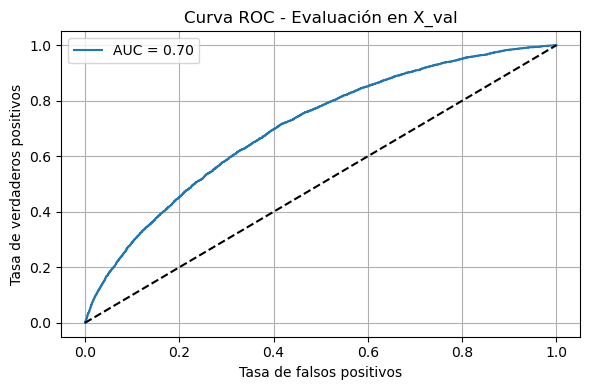

⚙️ Parámetros del modelo XGBoost:
• objective: binary:logistic
• base_score: None
• booster: None
• callbacks: None
• colsample_bylevel: None
• colsample_bynode: None
• colsample_bytree: None
• device: None
• early_stopping_rounds: 5
• enable_categorical: False
• eval_metric: auc
• feature_types: None
• feature_weights: None
• gamma: None
• grow_policy: None
• importance_type: None
• interaction_constraints: None
• learning_rate: None
• max_bin: None
• max_cat_threshold: None
• max_cat_to_onehot: None
• max_delta_step: None
• max_depth: None
• max_leaves: None
• min_child_weight: None
• missing: nan
• monotone_constraints: None
• multi_strategy: None
• n_estimators: None
• n_jobs: None
• num_parallel_tree: None
• random_state: None
• reg_alpha: None
• reg_lambda: None
• sampling_method: None
• scale_pos_weight: None
• subsample: None
• tree_method: None
• validate_parameters: None
• verbosity: None


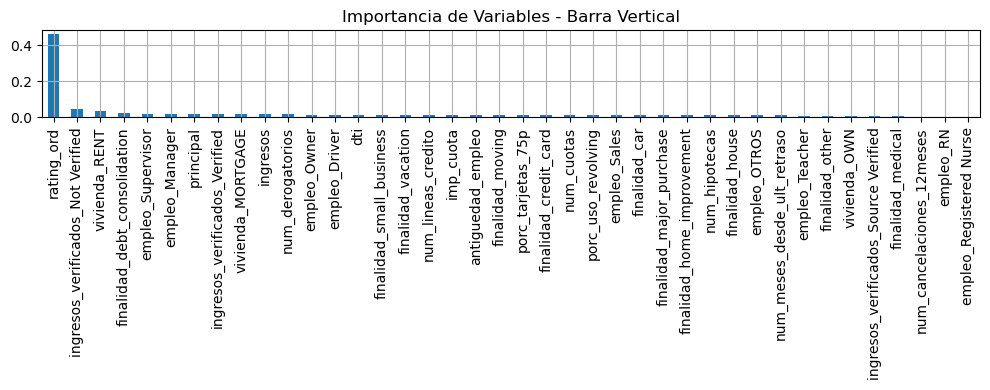

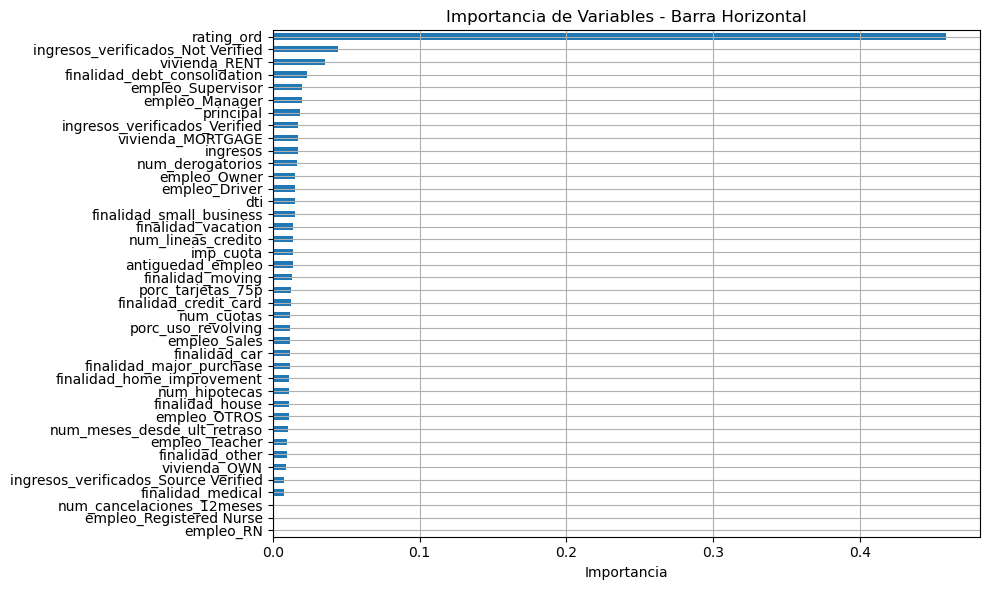


📋 Tabla ordenada de importancia de variables:


,variable,importancia
26,rating_ord,0.46
9,ingresos_verificados_Not Verified,0.04
14,vivienda_RENT,0.04
17,finalidad_debt_consolidation,0.02
7,empleo_Supervisor,0.02
1,empleo_Manager,0.02
39,principal,0.02
11,ingresos_verificados_Verified,0.02
12,vivienda_MORTGAGE,0.02
28,ingresos,0.02


In [7]:
# =============================================================
# 🚀 Entrenamiento y evaluación de un modelo XGBoost
# =============================================================
# ➤ Entrena el modelo con early stopping usando X_test
# ➤ Evalúa el rendimiento final en X_val con ROC AUC
# ➤ Visualiza la curva ROC y la importancia de variables
# ➤ Mide la relevancia de cada variable en la predicción
# =============================================================
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve


# -----------------------------------------
# 1️⃣ Instanciar y entrenar el clasificador XGBoost
# -----------------------------------------
xgb = XGBClassifier(
    eval_metric='auc',              # Métrica usada internamente
    early_stopping_rounds=5         # Parar si no mejora en 5 rondas
)

# Entrenamiento con validación interna usando X_test
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# -----------------------------------------
# 2️⃣ Predicción sobre conjunto de validación final (X_val)
# -----------------------------------------
pred = xgb.predict_proba(X_val)[:, 1]  # Probabilidad clase positiva
print("\n📦 Primeras 10 predicciones de probabilidad:")
print(pred[:10])

# -----------------------------------------
# 3️⃣ Evaluación con AUC sobre X_val
# -----------------------------------------
roc_auc = roc_auc_score(y_val, pred)
print(f"\n🎯 ROC AUC en test (X_val): {roc_auc:.4f}\n")

# -----------------------------------------
# 4️⃣ Curva ROC para evaluación visual
# -----------------------------------------
fpr, tpr, _ = roc_curve(y_val, pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Evaluación en X_val")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 5️⃣ Revisión de parámetros del modelo entrenado
# -----------------------------------------
print("⚙️ Parámetros del modelo XGBoost:")
params = xgb.get_params()
for k, v in params.items():
    print(f"• {k}: {v}")

# -----------------------------------------
# 6️⃣ Visualización de importancia de variables (barra vertical)
# -----------------------------------------
pd.Series(xgb.feature_importances_, index=X_test.columns) \
  .sort_values(ascending=False) \
  .plot(kind='bar', figsize=(10, 4), title='Importancia de Variables - Barra Vertical')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 7️⃣ Visualización alternativa (barra horizontal con variables en eje Y)
# -----------------------------------------
pd.Series(xgb.feature_importances_, index=X_test.columns) \
  .sort_values() \
  .plot(kind='barh', figsize=(10, 6), title='Importancia de Variables - Barra Horizontal')
plt.xlabel("Importancia")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 8️⃣ Tabla ordenada de importancia
# -----------------------------------------
importancia = pd.DataFrame({
    'variable': X_test.columns,
    'importancia': xgb.feature_importances_
})
importancia_ordenada = importancia.sort_values(by='importancia', ascending=False)
print("\n📋 Tabla ordenada de importancia de variables:")
display(importancia_ordenada)


---
## LGBM
---


📦 Primeras 10 predicciones de probabilidad:
[0.03179162 0.14954813 0.15606377 0.04649298 0.08825444 0.08668602
 0.03228065 0.02596141 0.10207425 0.11118805]

🎯 ROC AUC en test (X_test): 0.7074


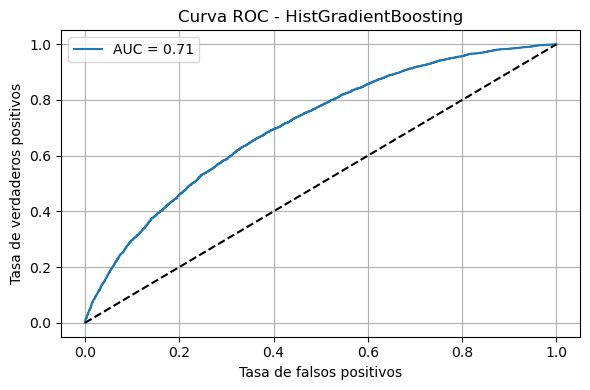


🔍 Calculando importancia de variables...


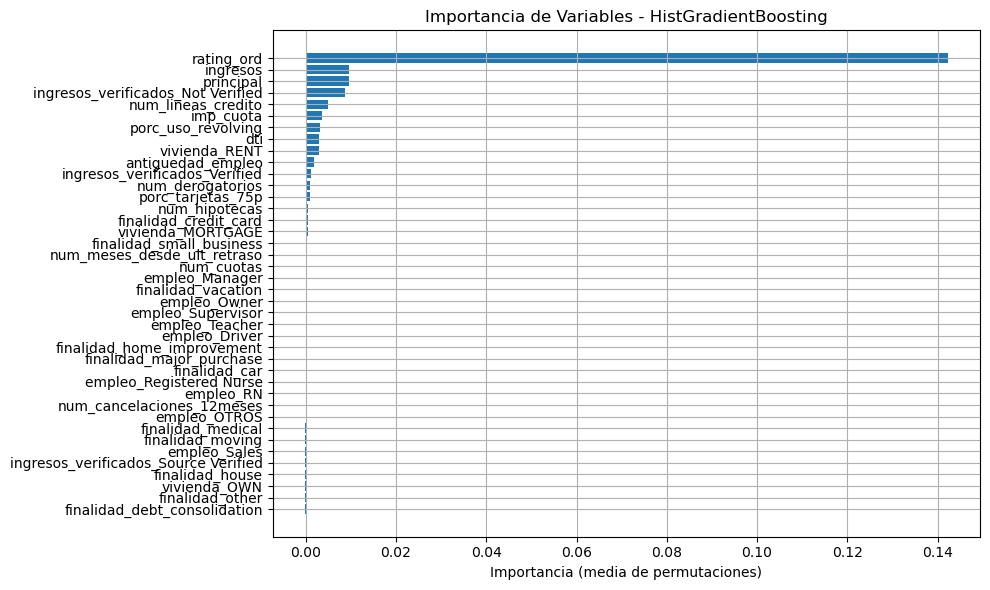


📋 Tabla ordenada de importancia de variables:


,variable,importancia
26,rating_ord,0.14
28,ingresos,0.01
39,principal,0.01
9,ingresos_verificados_Not Verified,0.01
31,num_lineas_credito,0.01
38,imp_cuota,0.00
33,porc_uso_revolving,0.00
29,dti,0.00
14,vivienda_RENT,0.00
27,antiguedad_empleo,0.00



⚙️ Parámetros del modelo HistGradientBoosting:
• categorical_features: from_dtype
• class_weight: None
• early_stopping: auto
• interaction_cst: None
• l2_regularization: 0.0
• learning_rate: 0.1
• loss: log_loss
• max_bins: 255
• max_depth: None
• max_features: 1.0
• max_iter: 100
• max_leaf_nodes: 31
• min_samples_leaf: 20
• monotonic_cst: None
• n_iter_no_change: 10
• random_state: None
• scoring: loss
• tol: 1e-07
• validation_fraction: 0.1
• verbose: 0
• warm_start: False


In [8]:
# =============================================================
# 🚀 HistGradientBoostingClassifier – Entrenamiento y Evaluación
# =============================================================
# ➤ Entrenamiento con X_train
# ➤ Evaluación con AUC y curva ROC sobre X_test
# ➤ Importancia de variables con permutation_importance
# =============================================================

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance


# -----------------------------------------
# 1️⃣ Entrenar el modelo
# -----------------------------------------
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)

# -----------------------------------------
# 2️⃣ Predicción en X_test
# -----------------------------------------
pred = hgb.predict_proba(X_test)[:, 1]
print("\n📦 Primeras 10 predicciones de probabilidad:")
print(pred[:10])

# -----------------------------------------
# 3️⃣ Evaluación con ROC AUC
# -----------------------------------------
roc_auc = roc_auc_score(y_test, pred)
print(f"\n🎯 ROC AUC en test (X_test): {roc_auc:.4f}")

# -----------------------------------------
# 4️⃣ Curva ROC
# -----------------------------------------
fpr, tpr, _ = roc_curve(y_test, pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - HistGradientBoosting")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 5️⃣ Importancia de variables con permutation_importance
# -----------------------------------------
print("\n🔍 Calculando importancia de variables...")
result = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

# Obtener nombres de variables
features = X_test.columns if isinstance(X_test, pd.DataFrame) else [f"var_{i}" for i in range(X_test.shape[1])]

importancia_df = pd.DataFrame({
    "variable": features,
    "importancia": result.importances_mean
}).sort_values(by="importancia", ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
plt.barh(importancia_df["variable"], importancia_df["importancia"])
plt.xlabel("Importancia (media de permutaciones)")
plt.title("Importancia de Variables - HistGradientBoosting")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 6️⃣ Tabla ordenada de importancia
# -----------------------------------------
importancia_ordenada = importancia_df.sort_values(by="importancia", ascending=False)
print("\n📋 Tabla ordenada de importancia de variables:")
display(importancia_ordenada)

# -----------------------------------------
# 7️⃣ Parámetros del modelo
# -----------------------------------------
print("\n⚙️ Parámetros del modelo HistGradientBoosting:")
params = hgb.get_params()
for k, v in params.items():
    print(f"• {k}: {v}")

---
## Cálculo del Interés Mínimo Ajustado al Riesgo
---

In [9]:
# =============================================================
# 💰 Cálculo del Interés Mínimo Ajustado al Riesgo
# =============================================================
# ➤ Calcula el interés mínimo recomendado en función de la probabilidad de impago (PD)
# ➤ Utiliza la fórmula: interés = tipo_base + (coef_riesgo * PD)
# ➤ Muestra una tabla con clientes, su PD y el interés sugerido
# ➤ Prepara los datos para la futura app de simulación con Streamlit
# =============================================================

# ✅ Parámetros del modelo de pricing
tipo_base = 0.05         # Interés base del negocio (5%)
coef_riesgo = 0.10       # Margen de riesgo proporcional (10%)

# ✅ Cálculo del interés mínimo ajustado al riesgo
# La PD ya está calculada por el modelo en la variable `pred`
interes_minimo = tipo_base + coef_riesgo * pred

# ✅ Crear tabla resumen con los resultados
# Convertimos X_test en DataFrame si no lo es ya
X_test_df = X_test.copy()
if not isinstance(X_test_df, pd.DataFrame):
    import numpy as np
    X_test_df = pd.DataFrame(X_test_df, columns=[f"var_{i}" for i in range(X_test_df.shape[1])])

# Combinamos variables originales, PD e interés mínimo
df_resultados = X_test_df.reset_index(drop=True).copy()
df_resultados["PD"] = pred
df_resultados["interes_minimo"] = interes_minimo

# ✅ Redondear para mostrar en forma clara
df_resultados["PD"] = df_resultados["PD"].round(4)
df_resultados["interes_minimo"] = (df_resultados["interes_minimo"] * 100).round(2)  # en %

# ✅ Mostrar una muestra de resultados
print("📊 Muestra de interés mínimo calculado por cliente:\n")
display(df_resultados.head(10))

# ✅ Estadísticas generales del interés calculado
print("\n📈 Estadísticas del interés mínimo ajustado al riesgo:")
print(df_resultados["interes_minimo"].describe().round(2))

# ✅ Conclusiones del cálculo
print("\n✅ Cálculo completado: El interés mínimo ajustado al riesgo ha sido generado para cada cliente.")
print("📌 Cuanto mayor es la probabilidad de impago (PD), mayor es el interés sugerido.")
print("🔜 Próximo paso: Crear una aplicación en Streamlit que permita:")
print("    1. Introducir un nuevo perfil de cliente")
print("    2. Calcular la PD con el modelo entrenado")
print("    3. Aplicar esta fórmula de pricing y calcular la cuota mensual del préstamo.")


📊 Muestra de interés mínimo calculado por cliente:



,empleo_Driver,empleo_Manager,empleo_OTROS,empleo_Owner,empleo_RN,empleo_Registered Nurse,empleo_Sales,empleo_Supervisor,empleo_Teacher,ingresos_verificados_Not Verified,ingresos_verificados_Source Verified,ingresos_verificados_Verified,vivienda_MORTGAGE,vivienda_OWN,vivienda_RENT,finalidad_car,finalidad_credit_card,finalidad_debt_consolidation,finalidad_home_improvement,finalidad_house,finalidad_major_purchase,finalidad_medical,finalidad_moving,finalidad_other,finalidad_small_business,finalidad_vacation,rating_ord,antiguedad_empleo,ingresos,dti,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,num_cuotas,imp_cuota,principal,PD,interes_minimo
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,0.08,1.00,9.00,0.50,0.10,0.00,1,26.00,0.00,0.04,0.05,0.03,5.32
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,1.00,0.20,0.17,2.00,10.00,0.33,0.15,0.00,0,5.00,0.00,0.39,0.49,0.15,6.50
2,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.56,0.20,0.07,1.00,9.00,0.00,0.07,0.00,1,0.00,0.00,0.39,0.49,0.16,6.56
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.17,1.00,0.23,0.27,0.00,15.00,0.11,0.04,0.00,0,0.00,0.00,0.03,0.04,0.05,5.46
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,1.00,0.28,0.30,2.00,8.00,1.00,0.26,0.00,0,19.00,0.00,0.21,0.27,0.09,5.88
5,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.50,1.00,0.52,0.34,1.00,19.00,0.75,0.23,0.00,0,0.00,0.00,0.20,0.23,0.09,5.87
6,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.56,0.13,1.00,15.00,0.50,0.16,0.00,0,35.00,0.00,0.55,0.75,0.03,5.32
7,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.15,0.18,2.00,6.00,0.00,0.14,0.00,0,52.00,0.00,0.11,0.14,0.03,5.26
8,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.56,0.27,0.24,1.00,10.00,1.00,0.27,0.00,0,0.00,0.00,0.23,0.29,0.10,6.02
9,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,1.00,0.20,0.19,0.00,22.00,0.00,0.08,0.00,0,11.00,0.00,0.12,0.16,0.11,6.11



📈 Estadísticas del interés mínimo ajustado al riesgo:
count   31789.00
mean        6.18
std         0.78
min         5.14
25%         5.58
50%         6.02
75%         6.59
max        11.14
Name: interes_minimo, dtype: float64

✅ Cálculo completado: El interés mínimo ajustado al riesgo ha sido generado para cada cliente.
📌 Cuanto mayor es la probabilidad de impago (PD), mayor es el interés sugerido.
🔜 Próximo paso: Crear una aplicación en Streamlit que permita:
    1. Introducir un nuevo perfil de cliente
    2. Calcular la PD con el modelo entrenado
    3. Aplicar esta fórmula de pricing y calcular la cuota mensual del préstamo.


In [10]:
# =============================================================
# 💾 Guardado del Modelo y del Scaler para su uso en la App
# =============================================================
# ➤ Guarda el modelo HistGradientBoostingClassifier entrenado
# ➤ Guarda el StandardScaler (si se usó escalado previo)
# ➤ Permite reutilizar ambos objetos en la app de Streamlit
# =============================================================

import joblib
import os

# Crear carpeta destino si no existe
output_path = "../outputs/models"
os.makedirs(output_path, exist_ok=True)

# Guardar el modelo entrenado
joblib.dump(hgb, f"{output_path}/modelo_hist_gradient_boosting.pkl")

# Guardar el scaler (si se usó para transformar X_train/X_test)
joblib.dump(scaler, f"{output_path}/scaler.pkl")

print("✅ Modelo y scaler guardados correctamente.")
print("📁 Archivos creados en outputs/models/:")
print("   - modelo_hist_gradient_boosting.pkl")
print("   - scaler.pkl")


✅ Modelo y scaler guardados correctamente.
📁 Archivos creados en outputs/models/:
   - modelo_hist_gradient_boosting.pkl
   - scaler.pkl
